<a href="https://colab.research.google.com/github/dlskawns/LG_Uplus_AI_Stage/blob/main/pytorch_applied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tensorboard

CLI 환경에서 진행해야 함

In [ ]:
ㄴㅁㅇㄹㅁㄴ

In [ ]:
!pip install tensorboard

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



SystemExit: ignored

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


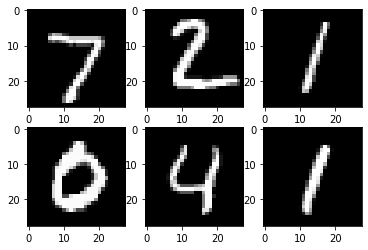

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import sys
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("runs/mnist")
# device configuration
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

# hyper params
input_size = 784 #28 * 28
hidden_size = 500
num_classes = 10
num_epochs = 1
batch_size = 64
learning_rate = 0.001

#MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform = transforms.ToTensor())

# data loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle = False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(example_data[i][0], cmap = 'gray')
#plt.show()


###### 이미지 텐서보드
# img_grid = torchvision.utils.make_grid(example_data)
# writer.add_image('mnist_images',img_grid)
# writer.close()
# sys.exit()
####### 모델 텐서보드
# writer.add_graph(model, example_data.reshape(-1, 28*28))


class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.input_size = input_size
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)
  
  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# 손실함수 및 옵티마이저
criterion = CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


# 훈련 루프
n_total_steps = len(train_loader) #총 스텝 = 훈련셋 길이

for epoch in range(num_epochs):
  for i,(images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i+1) % 100 == 0:
      print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{num_total_stpes}], Loss: {loss.item():.4f}")

with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    _, pred = torch.max(outputs.data, 1)
    n_samples += labels.size(0)
    n_correct += (pred == labels).sum().item()
  
acc = 100*n_correct /n_samples
print(f' accuracy:{acc}%')

## Saving and Loading Models



In [ ]:
import torch
import torch.nn as nn
torch.save(arg, PATH)
torch.load(PATH)
model.load_state_dict(arg)

PATH = "model.pth"
#1번 방법 lazy option

# 모델 저장
torch.save(model, PATH)
# 모델 불러오기 
model = torch.load(PATH)
# weight를 축적시키지 않고 그야말로 활용하는 방버
model.eval()


# 2번 방법 모델 저장하기 with state_dict()

torch.save(model.state_dict(), PATH) # state_dict가 파라미터를 저장해줌
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()


In [ ]:
import torchvision
from sklearn.model_selection import train_test_split



#configs
num_epochs = 3
batch_size = 100

data = torch.randn(100000, 5)
labels = torch.randint(low=0, high = 2, size = (100000,))


x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 2 )

In [ ]:
y_train

tensor([1, 1, 1,  ..., 1, 1, 1])

In [ ]:
y_train.view(y_train.shape[0], 1)

tensor([[0],
        [1],
        [0],
        ...,
        [1],
        [1],
        [1]])

In [ ]:
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [ ]:
n_samples, n_features = data.shape

In [ ]:
import torch
import torch.nn as nn
#state_dict는 각각의 parameter를 직접 볼 수 있어 좋음

# device configuration
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

# hyper params
input_size = 5 #28 * 28
# hidden_size = 500
# num_classes = 10
num_epochs = 5
batch_size = 100
lr = 0.001

class newmodel(nn.Module):
  def __init__(self, input_size):
    super(newmodel, self).__init__()
    self.input_size = input_size
    self.lin = nn.Linear(input_size, 1)
  def forward(self, x):
    return torch.sigmoid(self.lin(x))


n_features = 5
# model design
model = newmodel(input_size)

# optimizer & loss criterion
optimizer = torch.optim.SGD(model.parameters(), lr =lr)
criterion = nn.BCELoss()
print(optimizer.state_dict())

{'state': {}, 'param_groups': [{'lr': 0.001, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1]}]}


In [ ]:
y_train

tensor([1, 1, 0,  ..., 1, 0, 1])

In [ ]:

#학습 후 확인 해보기
for epoch in range(num_epochs):
  n_samples = 0 
  n_correct = 0 
  labels = y_train.view(y_train.shape[0], 1).to(torch.float32)
  pred = model(x_train)
  loss = criterion(pred, labels)
  
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  print(f'epoch:{epoch:.4f}, loss:{loss:.4f}')





epoch:0.0000, loss:0.7385
epoch:1.0000, loss:0.7384
epoch:2.0000, loss:0.7384
epoch:3.0000, loss:0.7384
epoch:4.0000, loss:0.7384


In [ ]:
print(optimizer.state_dict())

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}}, 'param_groups': [{'lr': 0.001, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1]}]}


In [ ]:
# save on GPU, Load on CPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

device = torch.deivce('cpu')
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location = device))

# save on GPU, Load on GPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.to(device)

# save on CPU, Load on GPU
torch.save(model.state_dict(), PATH)

device = torch.deivce('cuda')
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location = "cuda:0"))
model.to(device)

## RNN


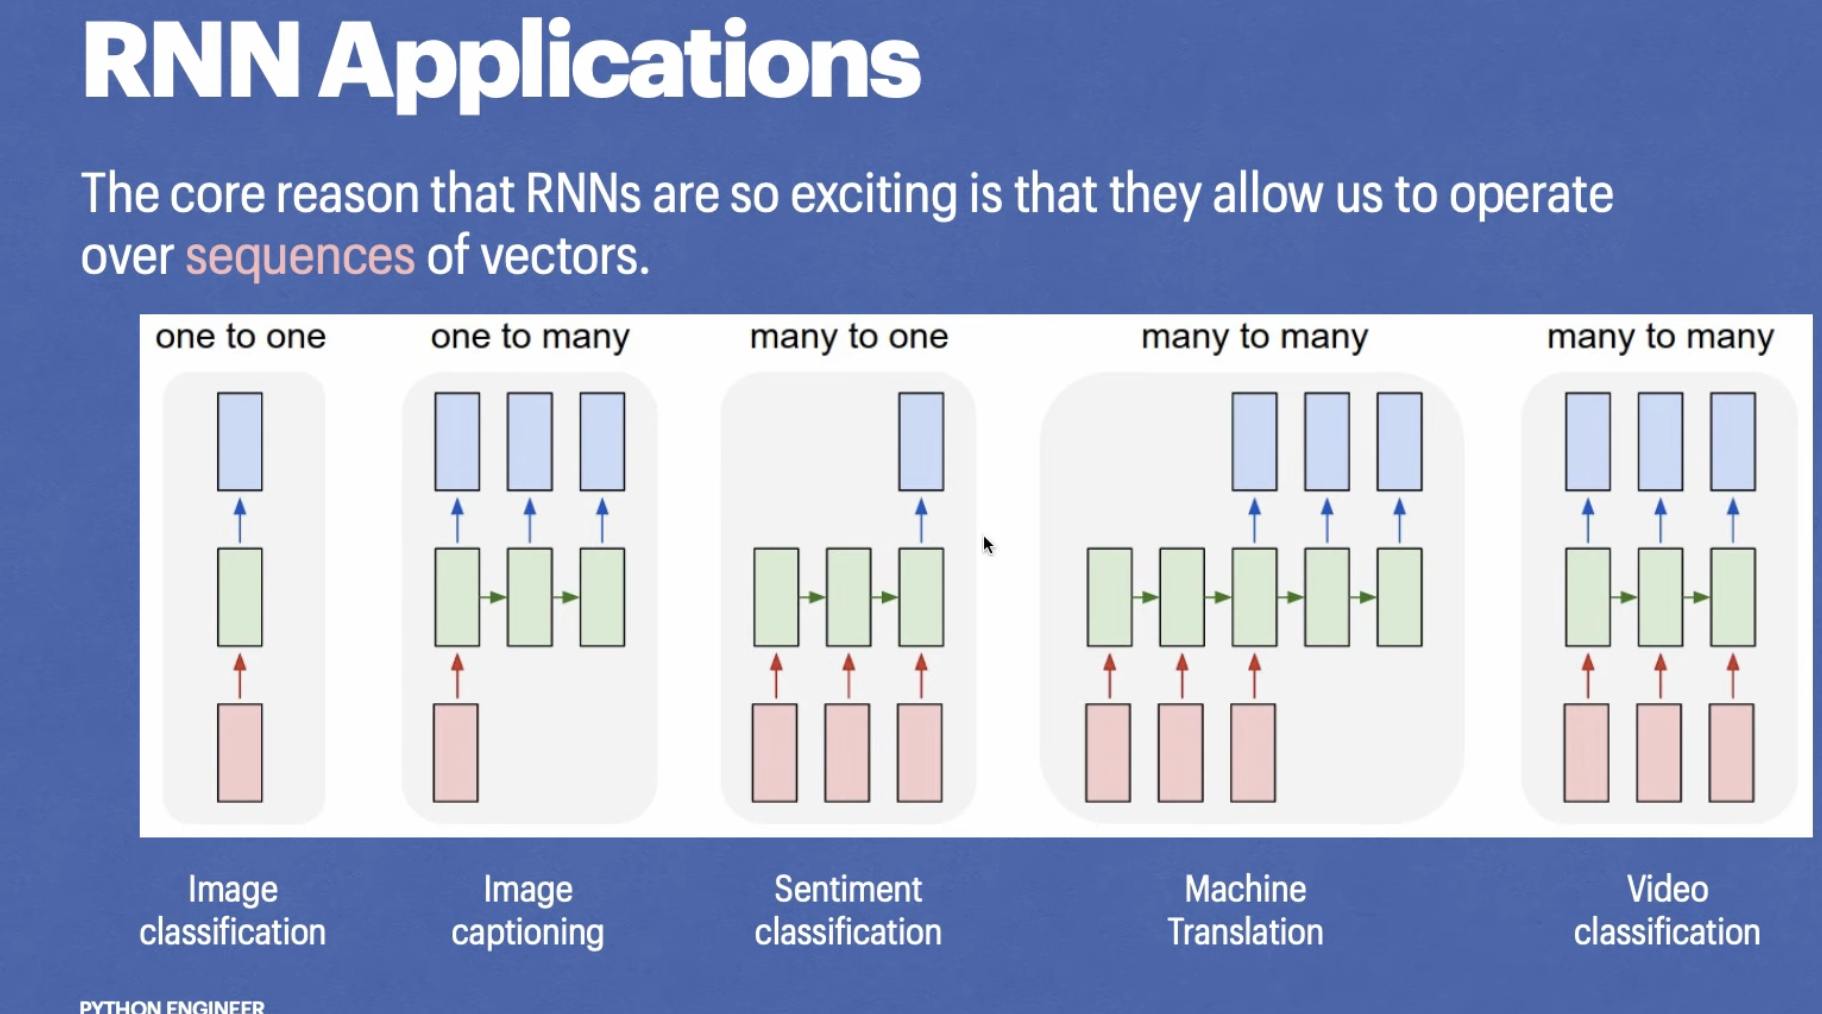